In [ ]:
源码连接：

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: MacOSX


## 自定义构建的数据集

In [2]:
x = np.array([[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ])
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

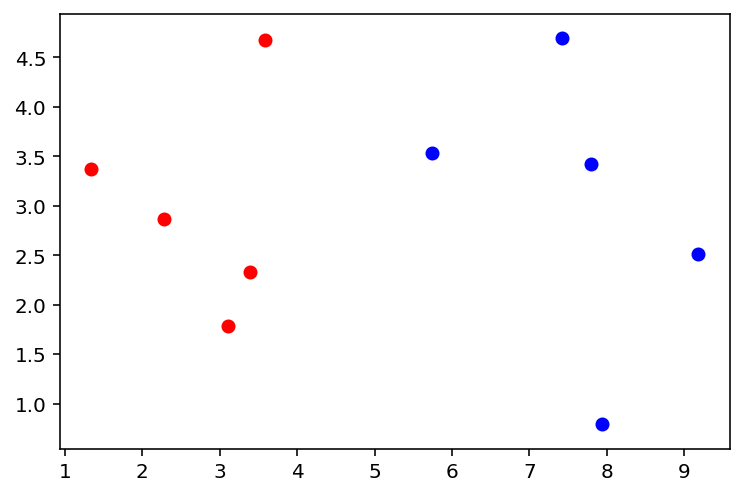

In [3]:
plt.scatter(x[y==0,0], x[y==0,1], color='r')
plt.scatter(x[y==1,0], x[y==1,1], color='b')
plt.show()

In [4]:
# 预测以下值属于y=0还是y=1
x_test = np.array([[8.093607318, 3.365731514]])

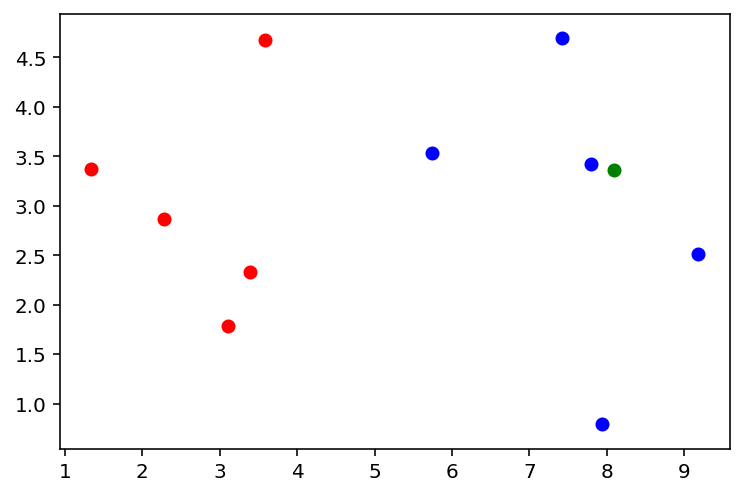

In [5]:
plt.scatter(x[y==0,0], x[y==0,1], color='r')
plt.scatter(x[y==1,0], x[y==1,1], color='b')
plt.scatter(x_test[:,0], x_test[:,1], color='g')
plt.show()

## 自定义实现KNN算法

### 算法探索

In [6]:
# 1. 求x_test与x训练集里每个点的距离
distance = ([np.sqrt(np.sum(item-x_test)**2) for item in x])
distance

[5.734532240000001,
 6.5677257110000005,
 6.747169047,
 3.1978656800000005,
 6.31198613,
 0.6606209850000004,
 2.1802970320000004,
 0.2239308349999991,
 0.24246641000000047,
 2.727880784]

In [7]:
# 2. 找到最相似的n个邻居
neighbor = 6
np.argsort(distance) 
y_neighbor = [y[index] for index in  np.argsort(distance)[0:neighbor]]
y_neighbor

[1, 1, 1, 1, 1, 0]

In [8]:
# 3. 看最邻近的邻居们大部分属于哪一类，那么待分类的数据就属于这类

In [9]:
from collections import Counter

result = Counter(y_neighbor)
print(result)
print('y_predict: ', result.most_common()[0][0])

Counter({1: 5, 0: 1})
y_predict:  1


### 算法封装

In [10]:
import numpy as np
from collections import Counter


class KNN:
    def __init__(self, neighbor=10):
        assert neighbor >= 1, 'neighbor must >=1'
        self.neighbor = neighbor
        self._x_train = None
        self._y_train = None
    
    def fit(self, x_train, y_train):
        assert x_train.shape[0] == y_train.shape[0], 'the size of x_train must equal to y_train'
        assert neighbor <= x_train.shape[0], 'the size of x_train must least neighbor'
        self._x_train = x_train
        self._y_train = y_train
        return
    
    def predict(self, x_predict):
        assert self._x_train is not None and self._y_train is not None, 'must fit before predict'
        assert self._x_train.shape[1] == x_predict.shape[1], 'the feature number of x_predict must be equal to x_train'
        return np.array([self._predict(item) for item in list(x_predict)])
    
    def _predict(self, x_predict):
        """
            1.求x_predict与x_train训练集里每个点的距离
            2.找到最相似的n个邻居
            3.看最邻近的邻居们大部分属于哪一类，那么待分类的数据就属于这类
        """
        distance = self._get_distance(x_predict)
        y_neighbor = [y[index] for index in np.argsort(distance)[0:self.neighbor]]        
        result = Counter(y_neighbor)
        return result.most_common()[0][0]
    
    def _get_distance(self, x_predict):
        """距离
        常用距离: 欧拉距离(本函数)，曼哈顿距离，明科夫斯基距离
        """
        distance = ([np.sqrt(np.sum(item-x_predict)**2) for item in self._x_train])        
        return distance


In [11]:
knn = KNN(neighbor=6)
knn.fit(x, y)
knn.predict(x_test)

array([1])

## sklearn

- class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)

- API文档：https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier


### 自定义数据集

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knnClassifier = KNeighborsClassifier(n_neighbors=6)
knnClassifier.fit(x, y)
knnClassifier.predict(x_test)

array([1])

### 莺尾花数据集

In [13]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV


param_grid = [
    {
        'weights': ['uniform'], 
        'n_neighbors': [i for i in range(1, 20)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 20)], 
        'p': [i for i in range(1, 6)]
    }
]

# 加载数据集
iris = load_iris()
x = iris.data
y = iris.target

# 划分训练与测试数据集
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=666)

# 选择knn模型
knn_clf = KNeighborsClassifier()

# 网格搜索最合适的超参数
%time
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1)
grid_search.fit(x_train, y_train)
print('best_score: ', grid_search.best_score_)
print('best_estimator: ', grid_search.best_estimator_)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 7.87 µs


/Users/cleland/.pyenv/versions/3.7.1/envs/base/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best_score:  0.9732142857142857
best_estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=4,
                     weights='distance')


/Users/cleland/.pyenv/versions/3.7.1/envs/base/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
